# The Yukon Interior dry forests

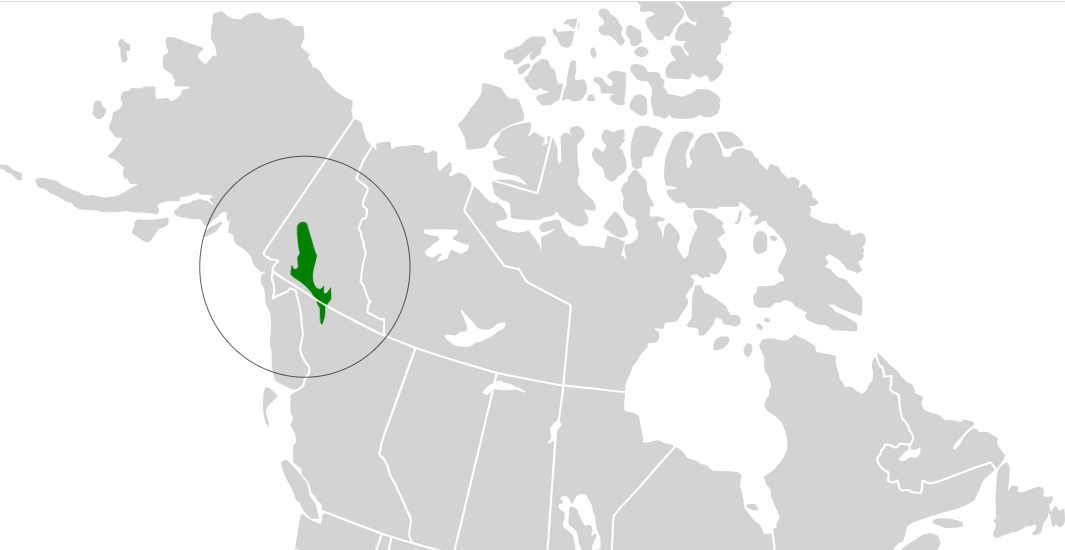

In [2]:
from IPython.display import Image
Image(filename='forest.png') 

Terrestrial ecoregions of North America : a conservation assessment. Taylor H Ricketts; et al. Washington, D.C. : Island Press, ©1999. xxiv, 485 p. : ill. (some col.), maps (some col.) ; 28 cm. (ISBN 9781559637220)

The Northern portion of Yukon Interior dry forests is located in the Yukon Plateau-Central of the **Yukon province** in Canada. Its Southern portion correlates with the Yukon Southern Lakes zone and covers a small area of northwestern **British Columbia**. The climate is mostly **cool and dry** with low precipitation between 225–400 mm. It consists of **Boreal forests/taiga** on a **Boreal mountain system**. The total area is **62,742 km2**, with its global status classified as "**vulnerable**."

**Soil resources** in the Yukon Interior dry forests include Cambisol, Cryosol, Leptosol, Organic and Podzol. **Permafrost** in poorly drained areas in the Yukon Plateau-Central (where the Northern portion of the ecoregion lies) results in **Cryosol** soils forming, where **forests of paper birch and black spruce** can be found. **Podzols** are rare and are present in **temperate, high rainfall forested areas**. Particularly in Yukon, Podzols are rich in iron concentrations.

Major tree species include white spruce (Picea
glauca), black spruce (Picea mariana) which are predominant in poorly drained areas, subalpine fir (Abies lasiocarpa) and lodgepole
pine (Pinus contorta). Shrubs can be found on wetlands and
near treeline in the south. **Wetlands** often has shallow open **water** and are important for wildlife habitat. Willow can be found in swamps and creeks and lichens grow on **rock fields**.

Snowshoe **hare** population thrives in the **Boreal forests/taiga** on 10-year cycles, and is a key species affecting the presence of species like coyotes (Canis latrans) and birds of prey like the golden eagle (Aquila chryaetos) in the forests. Other species are moose (Alces alces), caribou (Rangifer tarandus), common raven (Corvus corax), grizzly bear (Ursos arctos horribilis), gray wolf (Canis lupus)...

Ecoregions of the Yukon Territory, Biophysical Properties of Yukon Landscapes https://yukon.ca/sites/yukon.ca/files/env/env-ecoregions-yukon-territory.pdf

# Import libraries

In [3]:
import io, requests

import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio as rst

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
sns.set()

%matplotlib inline

# Get datasets

In [4]:
def getdf(link):
  req = requests.get(link).content
  return gpd.read_file(io.StringIO(req.decode('utf-8')))

# Administrative Boundaries

#### Get data for Yukon

In [5]:
ykn = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CAN/CAN_AL4_Yukon_GEZ.json'
ykn_df = getdf(ykn)

In [6]:
ykn_df

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CAN,CA-YT,Yukon,Boreal mountain system,43,BM,4,"POLYGON ((223.15848 67.12104, 223.15832 67.120..."
1,CAN,CA-YT,Yukon,Boreal tundra woodland,42,Bb,4,"MULTIPOLYGON (((235.93887 60.09024, 235.93047 ..."
2,CAN,CA-YT,Yukon,Polar,50,P,4,"MULTIPOLYGON (((223.52876 68.88346, 223.52947 ..."


#### Visualizing the Yukon province

<AxesSubplot:>

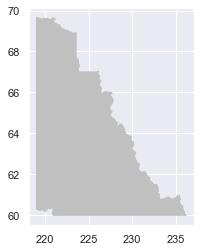

In [8]:
ykn_df.plot(color='silver',edgecolor='silver')

#### Get data for British Columbia

In [10]:
bricol = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CAN/CAN_AL4_British Columbia_GEZ.json'
bricol_df = getdf(bricol)

In [11]:
bricol_df

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CAN,CA-BC,British Columbia,Boreal coniferous forest,41,Ba,4,"POLYGON ((239.99864 54.53148, 239.99864 54.545..."
1,CAN,CA-BC,British Columbia,Boreal mountain system,43,BM,4,"MULTIPOLYGON (((229.51665 54.82880, 229.51665 ..."
2,CAN,CA-BC,British Columbia,Boreal tundra woodland,42,Bb,4,"POLYGON ((236.18882 60.00114, 236.00460 60.001..."
3,CAN,CA-BC,British Columbia,Temperate desert,34,TeBWk,4,"POLYGON ((240.68699 49.00009, 240.68677 49.000..."
4,CAN,CA-BC,British Columbia,Temperate mountain system,35,TeM,4,"MULTIPOLYGON (((235.10794 48.67623, 235.10789 ..."
5,CAN,CA-BC,British Columbia,Temperate oceanic forest,31,TeDo,4,"MULTIPOLYGON (((236.34204 48.31735, 236.34213 ..."


#### Visualizing the British Columbia province

<AxesSubplot:>

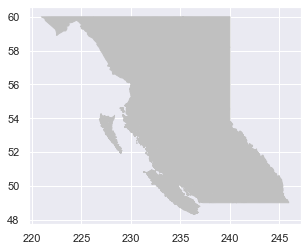

In [12]:
bricol_df.plot(color='silver',edgecolor='silver')

#### Concatenate the boundaries for the 2 provinces

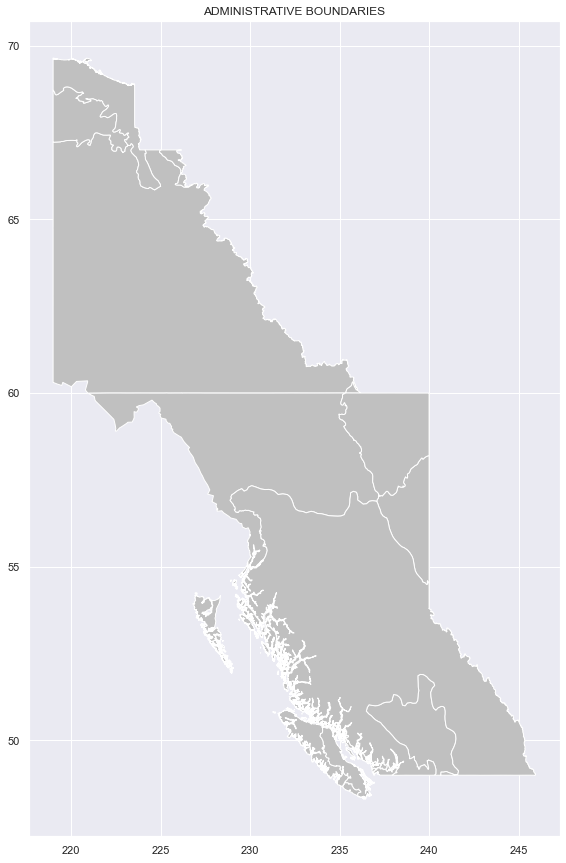

In [123]:
boundaries_df=pd.concat([ykn_df, bricol_df], axis=0)

fig,ax = plt.subplots(1,1,figsize=(20,15))
ax.set_title('ADMINISTRATIVE BOUNDARIES')
boundaries_df.plot(ax=ax,color='silver',edgecolor='white')
plt.show()

# The forests

#### Terrestrial ecoregions data

In [14]:
terr_ecoregions = "https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/TerrestrialEcoregionsoftheWorld_WWF.geojson"
terr_ecoregions_df = getdf(terr_ecoregions)

In [15]:
terr_ecoregions_df.shape

(14351, 22)

In [17]:
pd.options.display.max_columns = None
terr_ecoregions_df.head(3)

,OBJECTID_1,OBJECTID,AREA,ECO_NAME,REALM,BIOME,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,G200_REGIO,G200_NUM,G200_BIOME,G200_STAT,area_km2,eco_code,BIOME_1,GBL_STAT_1,REALM_1,Shape_Length,Shape_Area,geometry
0,1,1,29.802942,Northern Mesoamerican Pacific mangroves,NT,14,4,61404,119,1,,0,0,0,8174,NT1404,,,Neotropics,0.219475,0.002769,"POLYGON ((-112.30433 29.33480, -112.29035 29.3..."
1,2,2,11.977824,Northern Mesoamerican Pacific mangroves,NT,14,4,61404,119,1,,0,0,0,8174,NT1404,,,Neotropics,0.193289,0.001111,"POLYGON ((-112.19639 29.20719, -112.19669 29.2..."
2,3,3,77301.372760,Sinaloan dry forests,NT,2,28,60228,98,1,Southern Mexican Dry Forests,56,2,1,77362,NT0228,,,Neotropics,111.951414,6.879188,"POLYGON ((-108.40314 28.29783, -108.41069 28.3..."


#### Forests' statistics

In [184]:
ykn_int = terr_ecoregions_df[terr_ecoregions_df['ECO_NAME']=='Yukon Interior dry forests']
ykn_int

,OBJECTID_1,OBJECTID,AREA,ECO_NAME,REALM,BIOME,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,G200_REGIO,G200_NUM,G200_BIOME,G200_STAT,area_km2,eco_code,BIOME_1,GBL_STAT_1,REALM_1,Shape_Length,Shape_Area,geometry
5950,5951,5252,62742.225977,Yukon Interior dry forests,NA,6,17,50617,65,2,,0,0,0,62742,NA0617,,,Nearctic,39.383198,10.516696,"POLYGON ((-135.07761 62.66053, -135.18541 62.7..."


In [190]:
ykn_int2=ykn_int.copy()
ykn_int2.set_index("ECO_NAME",inplace=True)
ykn_stats=ykn_int2[['ECO_ID','REALM_1','GBL_STAT','BIOME','area_km2']].transpose()
ykn_stats

ECO_NAME,Yukon Interior dry forests
ECO_ID,50617
REALM_1,Nearctic
GBL_STAT,2
BIOME,6
area_km2,62742


Global status : 2 (Vulnerable)

Biome : 6 (Boreal forests/taiga)

#### Ecological zones

In [95]:
eco_zone = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/GlobalEcologicalZone_GEZFAO2010.json'
eco_zone_df = getdf(eco_zone)

In [99]:
eco_zone_df.shape

(16, 4)

In [100]:
eco_zone_df.head()

,gez_name,gez_code,gez_abbrev,geometry
0,Boreal coniferous forest,41,Ba,"MULTIPOLYGON (((-56.16234 46.78447, -56.16083 ..."
1,Boreal mountain system,43,BM,"MULTIPOLYGON (((141.22644 46.28333, 141.21997 ..."
2,Boreal tundra woodland,42,Bb,"MULTIPOLYGON (((158.95963 -54.50099, 158.96281..."
3,Polar,50,P,"MULTIPOLYGON (((-160.33360 -79.89813, -160.324..."
4,Subtropical desert,24,SBWh,"MULTIPOLYGON (((113.67935 -26.64496, 113.68238..."


In [101]:
eco_zone_df = eco_zone_df[['gez_name', 'geometry']]
eco_zone_df.head()

,gez_name,geometry
0,Boreal coniferous forest,"MULTIPOLYGON (((-56.16234 46.78447, -56.16083 ..."
1,Boreal mountain system,"MULTIPOLYGON (((141.22644 46.28333, 141.21997 ..."
2,Boreal tundra woodland,"MULTIPOLYGON (((158.95963 -54.50099, 158.96281..."
3,Polar,"MULTIPOLYGON (((-160.33360 -79.89813, -160.324..."
4,Subtropical desert,"MULTIPOLYGON (((113.67935 -26.64496, 113.68238..."


In [191]:
ykn_int_ecozone_df = eco_zone_df.clip(ykn_int)

ykn_int_ecozone_df

,gez_name,geometry
1,Boreal mountain system,"POLYGON ((-135.07576 62.65396, -135.06868 62.6..."


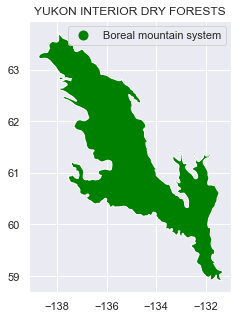

In [192]:
cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",['green','#2F75B5'])
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_title('YUKON INTERIOR DRY FORESTS')
ykn_int_ecozone_df.plot(ax=ax,column='gez_name',cmap=cmap,legend=True)
plt.show()

#### Holdridge life zones

In [127]:
holdridge= 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/HoldridgeLifeZones.json'
holdridge_df = getdf(holdridge)

In [128]:
holdridge_df.shape

(4831, 11)

In [129]:
holdridge_df.head()

,FID,AREA,PERIMETER,HOLDRIG_,HOLDRIG_ID,ZONE,CASE_,FREQUENCY,DESC,SYMBOL,geometry
0,0,240.50,173,2,3695,1,2,13,Ice,5,"POLYGON ((-61.00000 81.00000, -61.50000 81.000..."
1,1,1.25,6,3,110,2,3,232,Polar desert,5,"POLYGON ((-80.50000 83.00000, -81.00000 83.000..."
2,2,49.75,72,4,107,1,2,13,Ice,5,"POLYGON ((-80.50000 83.00000, -80.50000 82.500..."
3,3,0.25,2,5,108,2,3,232,Polar desert,5,"POLYGON ((-80.00000 83.00000, -80.00000 82.500..."
4,4,0.25,2,6,109,2,3,232,Polar desert,5,"POLYGON ((-73.50000 83.00000, -73.50000 82.500..."


In [130]:
holdridge_df = holdridge_df[['DESC', 'geometry']]
holdridge_df.head()

,DESC,geometry
0,Ice,"POLYGON ((-61.00000 81.00000, -61.50000 81.000..."
1,Polar desert,"POLYGON ((-80.50000 83.00000, -81.00000 83.000..."
2,Ice,"POLYGON ((-80.50000 83.00000, -80.50000 82.500..."
3,Polar desert,"POLYGON ((-80.00000 83.00000, -80.00000 82.500..."
4,Polar desert,"POLYGON ((-73.50000 83.00000, -73.50000 82.500..."


In [131]:
ykn_int_holdrige_df = holdridge_df.clip(ykn_int)

ykn_int_holdrige_df.shape

(22, 2)

In [132]:
ykn_int_holdrige_df.head()

,DESC,geometry
573,Polar rain tundra,"MULTIPOLYGON (((-131.50000 59.00000, -131.5000..."
611,Boreal rain forest,"MULTIPOLYGON (((-131.50000 59.00000, -131.5000..."
540,Polar rain tundra,"MULTIPOLYGON (((-136.00000 60.50000, -135.5000..."
574,Boreal wet forest,"POLYGON ((-132.50000 60.00000, -132.00000 60.0..."
541,Polar wet tundra,"POLYGON ((-135.00000 60.50000, -134.50000 60.5..."


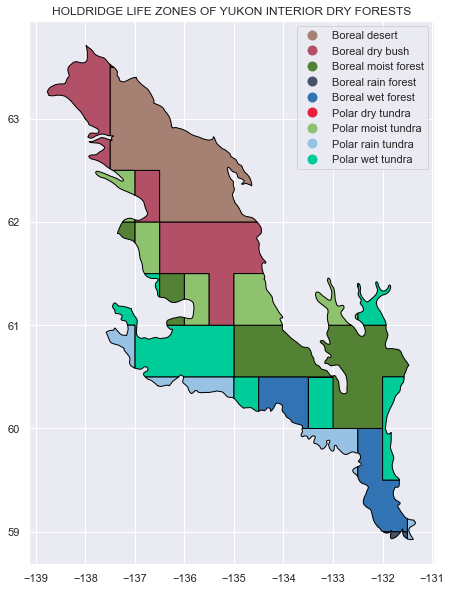

In [148]:
cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",['#A68072','#B25068','#548235','#44546A','#2F75B5','#EC1C3C','#8FC26C','#9BC2E6','#00CC99'])
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('HOLDRIDGE LIFE ZONES OF YUKON INTERIOR DRY FORESTS')
ykn_int_holdrige_df.plot(ax=ax,column='DESC',cmap=cmap,edgecolor='black',legend=True)
plt.show()

Major tree species include white spruce (Picea
glauca), black spruce (Picea mariana) which are predominant in poorly drained areas, subalpine fir (Abies lasiocarpa) and lodgepole
pine (Pinus contorta). Shrubs can be found on wetlands and near treeline. Wetlands often has shallow open water and are important for wildlife habitat. 

Snowshoe hare population thrives in the Boreal forests/taiga on 10-year cycles, and is a key species affecting the presence of species like coyotes (Canis latrans) and birds of prey like the golden eagle (Aquila chryaetos) in the forests.

# Climate

In [20]:
climate='https://datasets.mojaglobal.workers.dev/0:/Climate/IPCC_ClimateZoneMap_Vector.geojson'
climate_df=getdf(climate)

In [21]:
climate_df.shape

(26165, 2)

In [22]:
climate_df.head()

,CLASS_NAME,geometry
0,0,"MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ..."
1,0,"MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ..."
2,0,"MULTIPOLYGON (((-38.60000 83.40000, -38.60000 ..."
3,0,"MULTIPOLYGON (((-37.15000 83.40000, -37.15000 ..."
4,5,"MULTIPOLYGON (((-40.40000 83.40000, -40.40000 ..."


In [23]:
#remove all CLASS_NAME=0
climate_df=climate_df[climate_df['CLASS_NAME']!=0]

climate_df.shape

(23828, 2)

In [24]:
#filter data for the forest
ykn_int_climate_df = climate_df.clip(ykn_int)

ykn_int_climate_df.shape

(77, 2)

In [25]:
ykn_int_climate_df.head()

,CLASS_NAME,geometry
5286,8,"MULTIPOLYGON (((-137.95000 63.50000, -137.9000..."
3994,7,"POLYGON ((-137.35000 63.25000, -137.35000 63.1..."
3972,7,"POLYGON ((-137.75000 63.35000, -137.75000 63.2..."
3938,7,"POLYGON ((-138.00000 63.40000, -138.00000 63.3..."
5504,7,"MULTIPOLYGON (((-137.50000 60.90000, -137.5000..."


In [26]:
classification={'1':'Tropical montane','2':'Tropical wet', 
                '3':'Tropical moist','4':'Tropical dry', 
                '5':'Warm temperate moist','6':'Warm temperate dry',
                '7':'Cool temperate moist','8':'Cool temperate dry',
                '9':'Boreal moist','10':'Boreal dry','11':'Polar moist',
                '12':'Polar dry'}

ykn_int_climate_df['CLASS_NAME']=climate_df['CLASS_NAME'].astype('str').replace(classification)

ykn_int_climate_df.head()

,CLASS_NAME,geometry
5286,Cool temperate dry,"MULTIPOLYGON (((-137.95000 63.50000, -137.9000..."
3994,Cool temperate moist,"POLYGON ((-137.35000 63.25000, -137.35000 63.1..."
3972,Cool temperate moist,"POLYGON ((-137.75000 63.35000, -137.75000 63.2..."
3938,Cool temperate moist,"POLYGON ((-138.00000 63.40000, -138.00000 63.3..."
5504,Cool temperate moist,"MULTIPOLYGON (((-137.50000 60.90000, -137.5000..."


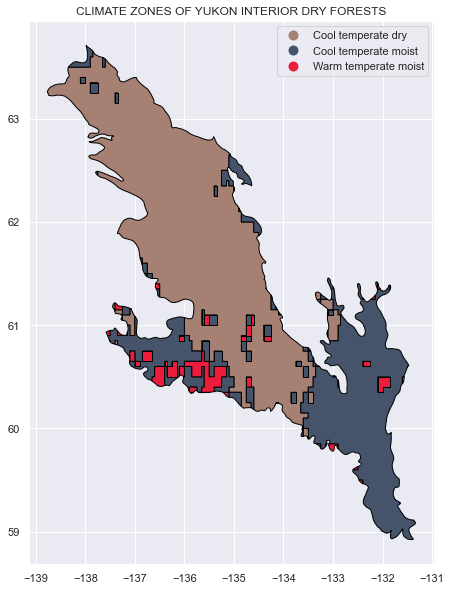

In [151]:
cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["#A68072","#44546A","#EC1C3C"])
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('CLIMATE ZONES OF YUKON INTERIOR DRY FORESTS')
ykn_int_climate_df.plot(ax=ax,column='CLASS_NAME',cmap=cmap,edgecolor='black',legend=True)
plt.show()

The climate is mostly cool and dry with low precipitation between 225–400 mm.

# Soil

#### Soil resources

In [28]:
soil = 'https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/World_Soil_Resources_wgs84.geojson'
soil_df = getdf(soil)

In [29]:
soil_df.shape

(33, 3)

In [30]:
soil_df.head()

,SNAME,IPCC,geometry
0,AB,Albeluvisol,"MULTIPOLYGON (((31.77594 49.15567, 31.98717 49..."
1,AC,Acrisol,"MULTIPOLYGON (((116.05041 -2.90441, 116.04652 ..."
2,AN,Andosol,"MULTIPOLYGON (((-79.98444 -3.35085, -79.98917 ..."
3,AR,Arenosol,"MULTIPOLYGON (((60.36591 43.61313, 60.33553 43..."
4,AT,Anthrosol,"MULTIPOLYGON (((122.11467 30.15301, 121.90077 ..."


In [31]:
soil_df = soil_df[['IPCC', 'geometry']]
soil_df.head()

,IPCC,geometry
0,Albeluvisol,"MULTIPOLYGON (((31.77594 49.15567, 31.98717 49..."
1,Acrisol,"MULTIPOLYGON (((116.05041 -2.90441, 116.04652 ..."
2,Andosol,"MULTIPOLYGON (((-79.98444 -3.35085, -79.98917 ..."
3,Arenosol,"MULTIPOLYGON (((60.36591 43.61313, 60.33553 43..."
4,Anthrosol,"MULTIPOLYGON (((122.11467 30.15301, 121.90077 ..."


In [32]:
ykn_int_soil_df = soil_df.clip(ykn_int)

ykn_int_soil_df.shape

(5, 2)

In [33]:
ykn_int_soil_df

,IPCC,geometry
20,Organic,"POLYGON ((-137.91431 63.47515, -138.04204 63.4..."
9,Cryosol,"POLYGON ((-138.14374 63.46472, -138.04204 63.4..."
8,Cambisol,"POLYGON ((-138.13193 63.17026, -138.07693 63.3..."
19,Leptosol,"MULTIPOLYGON (((-134.14288 61.09057, -134.2652..."
27,Podzol,"MULTIPOLYGON (((-131.83536 59.69940, -131.8390..."


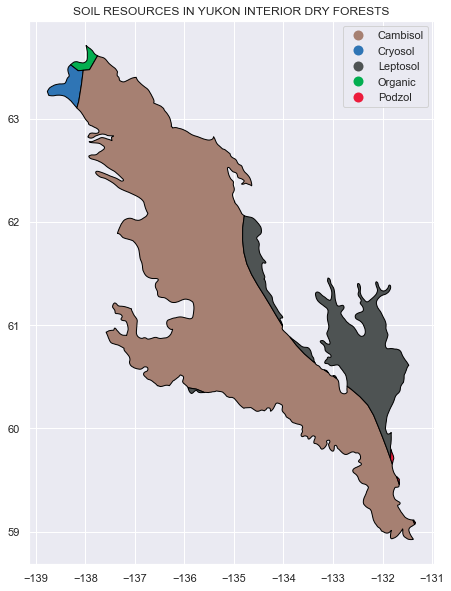

In [97]:
cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",['#A68072','#2F75B5','#4F5253','#00B050','#EC1C3C'])
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('SOIL RESOURCES IN YUKON INTERIOR DRY FORESTS')
ykn_int_soil_df.plot(ax=ax,column='IPCC',cmap=cmap,edgecolor='black',legend=True)
plt.show()

Soil resources in the Yukon Interior dry forests include Cambisol, Cryosol, Leptosol, Organic and Podzol. Permafrost in poorly drained areas in the Yukon Plateau-Central (where the Northern portion of the ecoregion lies) results in Cryosol soils forming, where forests of paper birch and black spruce can be found. Podzols are rare and are present in temperate, high rainfall forested areas. Particularly in Yukon, Podzols are rich in iron concentrations.

#### Global Agro‐Ecological Zones

In [70]:
agro = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/GAEZ_Global_AgroEcological_Zones/GlobalAgroEcologicalZones_GAEZ.geojson'
agro_df = getdf(agro)

In [71]:
agro_df.shape

(116675, 2)

In [73]:
agro_df.tail()

,Value,geometry
116670,2,"POLYGON ((-69.50000 -55.65000, -69.50000 -55.7..."
116671,1,"POLYGON ((-67.50000 -55.65000, -67.50000 -55.7..."
116672,2,"POLYGON ((-69.40000 -55.75000, -69.40000 -55.8..."
116673,2,"POLYGON ((-67.65000 -55.40000, -67.65000 -55.5..."
116674,2,"POLYGON ((-66.85000 -55.75000, -66.85000 -55.9..."


In [74]:
ykn_int_agro_df = agro_df.clip(ykn_int)

ykn_int_agro_df.shape

(160, 2)

In [75]:
ykn_int_agro_df.head()

,Value,geometry
13032,10,"POLYGON ((-137.85000 63.65000, -137.90000 63.6..."
13611,10,"POLYGON ((-137.65000 63.50000, -137.65000 63.4..."
13473,10,"POLYGON ((-137.15000 63.35000, -137.40000 63.3..."
13476,10,"POLYGON ((-136.99430 63.40000, -136.97362 63.4..."
13472,9,"POLYGON ((-137.50000 63.40000, -137.55000 63.4..."


In [76]:
values = {'1': 'Steep terrain', '2': 'Artic/Cold', '3': 'Desert/Arid', 
          '4': 'Irrigated Soils', '5': 'Hydromorphic soils', 
          '6': 'Dry, good soils', '7': 'Dry, moderate soils', '8': 'Dry, poor soils', 
          '9': 'Moist, good soils', '10': 'Moist, moderate soils', 
          '11': 'Moist, poor soils', '12': 'Sub-humid, good soils', 
          '13': 'Sub-humid, moderate soils', '14': 'Sub-humid, poor soils', 
          '15': 'Humid, good soils', '16': 'Humid, moderate soils', 
          '17': 'Humid, poor soils', '18': 'Water'}

ykn_int_agro_df['Value']=agro_df['Value'].astype('str').replace(values)

ykn_int_agro_df.head()

,Value,geometry
13032,"Moist, moderate soils","POLYGON ((-137.85000 63.65000, -137.90000 63.6..."
13611,"Moist, moderate soils","POLYGON ((-137.65000 63.50000, -137.65000 63.4..."
13473,"Moist, moderate soils","POLYGON ((-137.15000 63.35000, -137.40000 63.3..."
13476,"Moist, moderate soils","POLYGON ((-136.99430 63.40000, -136.97362 63.4..."
13472,"Moist, good soils","POLYGON ((-137.50000 63.40000, -137.55000 63.4..."


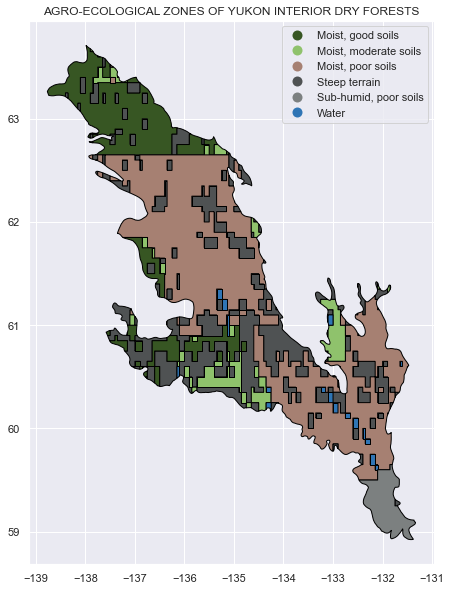

In [96]:
cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["#375623","#8FC26C","#A68072","#4F5253","#7C8080","#2F75B5"])
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('AGRO-ECOLOGICAL ZONES OF YUKON INTERIOR DRY FORESTS')
ykn_int_agro_df.plot(ax=ax,column='Value',cmap=cmap,edgecolor='black',legend=True)
plt.show()

Shrubs can be found on wetlands. Wetlands often has shallow open water and are important for wildlife habitat. Willow can be found in swamps and creeks and lichens grow on rock fields.